# Inaugural Project

Hi! Welcome to my Inaugural Project.

Here I import modules and auto-reload them to make the code run smoothly. 
<br>
I also import the model from the folder `inauguralproject`, which this code refers to.

In [1]:
# Import modules
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

# Autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import the model
from inauguralproject import HouseholdSpecializationModelClass

I use a general style for all my plots!

In [2]:
# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 12})

# Question 1

To solve Question 1, I call the model, create two vectors, one for the values of $\alpha$ and one for the values of $\sigma$, and create empty lists to append the results. <br> 
Next, I solve the model for varying $\alpha$ and $\sigma$ values using a nested `for loop`.

In [3]:
# Call the model
model = HouseholdSpecializationModelClass()

# Create vectors of alpha and sigma values
alpha_vec = [0.25, 0.50, 0.75]
sigma_vec = [0.5, 1.0, 1.5]

# Create a empty list for the result
alpha_list = []
sigma_list = []
HF_HM_list = []

# For each value of alpha in the alpha vector solve the model for HF_HM
for alpha in alpha_vec:

    # Set the models alpha paramter to alpha
    model.par.alpha = alpha
    
    #Ignore the warning, which arises due to the reciprocal being in proximity to zero    
    warnings.filterwarnings(action='ignore')

    # For each value of sigma in the sigma vector solve the model for HF_HM
    for sigma in sigma_vec:
        
        # set the models sigma parameter to sigma
        model.par.sigma = sigma

        # solve the model
        opt = model.solve_discrete()

        # For each value of HF and HM find HF/HM
        HF_HM = opt.HF / opt.HM

        # append the result to the lists
        alpha_list.append(alpha)
        sigma_list.append(sigma)
        HF_HM_list.append(HF_HM)

        # print results
        print(f'HF/HM ={HF_HM: .3f} for alpha = {alpha}, sigma = {sigma}')

HF/HM = 0.545 for alpha = 0.25, sigma = 0.5
HF/HM = 0.308 for alpha = 0.25, sigma = 1.0
HF/HM = 0.214 for alpha = 0.25, sigma = 1.5
HF/HM = 1.000 for alpha = 0.5, sigma = 0.5
HF/HM = 1.000 for alpha = 0.5, sigma = 1.0
HF/HM = 1.000 for alpha = 0.5, sigma = 1.5
HF/HM = 1.833 for alpha = 0.75, sigma = 0.5
HF/HM = 3.250 for alpha = 0.75, sigma = 1.0
HF/HM = 4.667 for alpha = 0.75, sigma = 1.5


To present the results, I use `pd.DataFrame` to create a pivot table.

In [4]:
# Create DataFrame 
df = pd.DataFrame({'alpha': alpha_list, 'sigma': sigma_list, 'HF/HM': HF_HM_list})

# Convert the DataFrame into a pivot table
table = pd.pivot_table(df, values='HF/HM', index='sigma', columns='alpha')

# Round the numbers down to 3 decimals
table = table.round(3)

# display the pivot table
display(table)

alpha,0.25,0.50,0.75
sigma,,,
0.5,0.545,1.0,1.833
1.0,0.308,1.0,3.250
1.5,0.214,1.0,4.667


The table provides insights into how the parameters $\alpha$ and $\sigma$ impact women's household production relative to men's.

$\alpha$ represents women's relative household productivity compared to men's. As $\alpha$ increases, women's household production also increases, assuming all other factors remain unchanged.

The influence of $\sigma$, the elasticity of substitution between men's and women's household production, is dependent on the value of $\alpha$:

- When $\alpha<0.5$, an increase in $\sigma$ leads to a decrease in women's household production.
- When $\alpha>0.5$, an increase in $\sigma$ leads to an increase in women's household production.
- When $\alpha = 0.5$, the household productivity is equal for both genders, regardless of the $\sigma$ value.

In essence, men are more productive in the household than women when $\alpha$ is low. Conversely, women are more productive when $\alpha$ is high.

# Question 2

To solve Question 2, I call the model for the discrete case and calculate $log(H_{F}/H_{M})$ and $log(w_{F}/w_{M})$ for varying values of $w_{F}$. <br>
Next, I plot $log(H_F/H_M)$ against $log(w_F/w_M)$.

In [5]:
# Call the model
model = HouseholdSpecializationModelClass()

# Call model.solve_wF_vec() for the discrete case
model.solve_wF_vec(discrete=True)

# Calculate log(HF/HM) and log(wF/wM) for the discrete case
dis_log_HF_HM = np.log(model.sol.HF_vec / model.sol.HM_vec)
dis_log_wF_wM = np.log(model.par.wF_vec / model.par.wM)

# Print the lists
#print(f'Discrete case:\nlog(HF/HM) = {dis_log_HF_HM}\nlog(wF/wM) = {dis_log_wF_wM}')

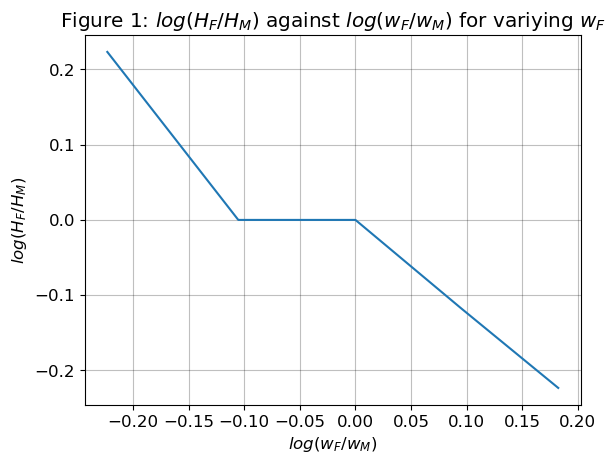

In [6]:
# Create a figure
fig = plt.figure()

# Plot the x and y
ax = fig.add_subplot(1,1,1)
ax.plot(dis_log_wF_wM,dis_log_HF_HM)

# Set title, x- and y-label. 
ax.set_title('Figure 1: $log(H_F/H_M)$ against $log(w_F/w_M)$ for variying $w_F$')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(H_F/H_M)$');

Based on the Figure 1, one can draw a normative economic conclusion that as women's earnings wages to men's increase, their engagement in household production decreases relative to men.

# Question 3

I solve Question 3 similarly to Question 2, except that I call the model for the continuous case. <br>
This modification should eliminate the kinks in figure 1, albeit dull, it should enhance the visual appeal.

In [7]:
# Call the model
model = HouseholdSpecializationModelClass()

# Call model.solve_wF_vec() for the continuous case
model.solve_wF_vec(discrete=False)

# Calculate log(HF/HM) and log(wF/wM) for the continuous case
c_log_HF_HM = np.log(model.sol.HF_vec / model.sol.HM_vec)
c_log_wF_wM = np.log(model.par.wF_vec / model.par.wM)

# Print the lists
#print(f'Continuous case:\nlog(HF/HM) = {c_log_HF_HM}\nlog(wF/wM) = {c_log_wF_wM}')


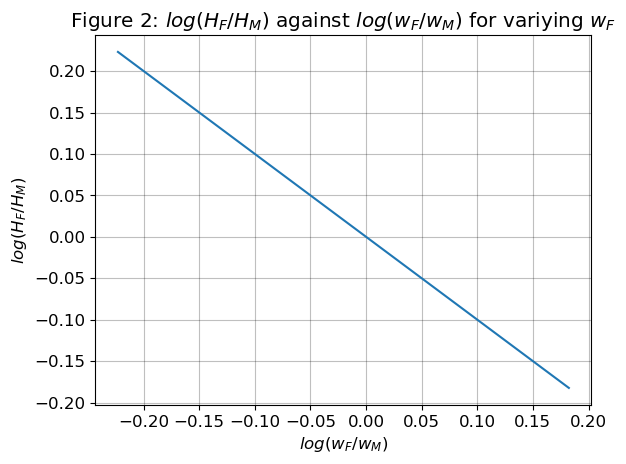

In [8]:
# Create a figure
fig = plt.figure()

# Plot x and y
ax = fig.add_subplot(1,1,1)
ax.plot(c_log_wF_wM,c_log_HF_HM)

# Set title, x- and y-label
ax.set_title('Figure 2: $log(H_F/H_M)$ against $log(w_F/w_M)$ for variying $w_F$')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(H_F/H_M)$');

I have eliminated the kinks!.. <br>
From Figure 2, it is now evident that the relationship between women's wages and their engagement in household production is linear and decreasing.

# Question 4

To solve Question 4, I call the model and estimate the values of $\alpha$ and $\sigma$, which minimizes $(\beta_{0} - \hat{\beta}_{0})^2 + (\beta_{1} - \hat{\beta}_{1})^2$.

In [9]:
# Call the model
model = HouseholdSpecializationModelClass()

# Estimate the values of alpha and sigma, which minimized the squared residuals
model.estimate()

# Print the solution
print(f"For alpha = {model.sol.alpha:.3f} and sigma = {model.sol.sigma:.3f} the squared errors are minimized such that:\n\
beta0 = {model.sol.beta0:.3f}\n\
beta1 = {model.sol.beta1:.3f}")

For alpha = 0.982 and sigma = 0.100 the squared errors are minimized such that:
beta0 = 0.400
beta1 = -0.100


In order to minimize the squared residuals, a high value of $\alpha$ and a low value of $\sigma$ are required. <br> 
This finding leads to a more economically positivistic conclusion: women's household productivity is significantly higher than men's, and the substitutability between working in the household and in the market is very low.

This may also be infered from the high $\beta_0\approx0.4$ and the sign of $\beta_1\approx-0.1$

# Question 5

To solve Question 5, I propose an extension to the model to match the data when $\alpha = 0.5$. <br>
I extend the model such that men experience a larger disutility from household production than women:

I first set a paramater $\kappa = 1$ and define the utility function as: $U = \frac{{Q^{1-\rho}}}{{1-\rho}} - \nu \left( \frac{{(L_M + \kappa H_M)^{1+\frac{1}{\epsilon}}}}{{1+\frac{1}{\epsilon}}} + \frac{{(L_F + H_F)^{1+\frac{1}{\epsilon}}}}{{1+\frac{1}{\epsilon}}} \right)$. <br>
Next, I call the model and estimate the values of $\sigma$ and $\kappa$, which minimizes $(\beta_{0} - \hat{\beta}_{0})^2 + (\beta_{1} - \hat{\beta}_{1})^2$.

In [10]:
model.estimate_sigma_kappa(alpha=0.5)

print(f"For alpha = {model.sol.alpha:.3f}, sigma = {model.sol.sigma:.3f} and kappa = {model.sol.kappa:.3f} the squared errors are minimized such that:\n\
beta0 = {model.sol.beta0:.3f}\n\
beta1 = {model.sol.beta1:.3f}")

For alpha = 0.500, sigma = 0.131 and kappa = 20.774 the squared errors are minimized such that:
beta0 = 0.400
beta1 = -0.100


Given that men and women are equally productive in the household, it requires men to experience about 21 more times disutility from engaging in household production than women to match the data. That is quite disturbing!